In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm
from scipy.optimize import curve_fit


# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
N = 2000
D = 2

n_range = np.arange(10, N, 20)
random_forward_path_weights = []
random_backward_path_weights = []

for n in tqdm(n_range):
    DAG = dag.CausalSetGraph()
    R = dag.minkowski_interval(n, D)
    G = DAG.generate_graph(R, weighted=True)
    random_forward = DAG.traverse_path(dag.random_path, 'forward')
    random_backward = DAG.traverse_path(dag.random_path, 'backward')
    random_forward_path_weights.append(DAG.get_path_weight(random_forward))
    random_backward_path_weights.append(DAG.get_path_weight(random_backward[::-1]))

random_forward_path_weights = np.asarray(random_forward_path_weights)
random_backward_path_weights = np.asarray(random_backward_path_weights)

100%|██████████| 100/100 [03:09<00:00,  1.90s/it]


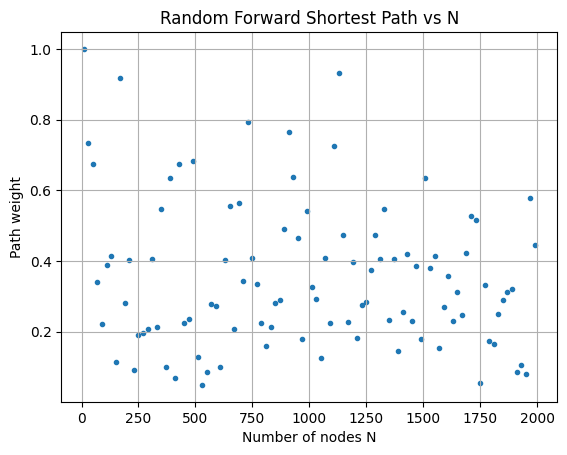

In [4]:
n_range = n_range.astype('float64')
plt.scatter(n_range, random_forward_path_weights, marker='.')
plt.title('Random Forward Shortest Path vs N')
plt.xlabel('Number of nodes N')
plt.ylabel('Path weight')
plt.grid(True)
# Set log-log scale
# plt.xscale('log')
# plt.yscale('log')
plt.show()

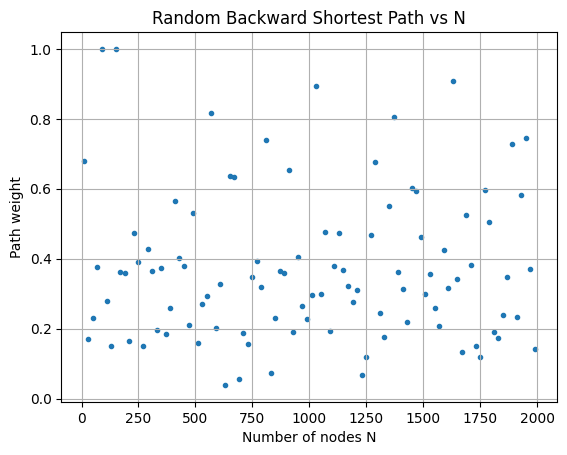

In [5]:
plt.scatter(n_range, random_backward_path_weights, marker='.')
plt.title('Random Backward Shortest Path vs N')
plt.xlabel('Number of nodes N')
plt.ylabel('Path weight')
plt.grid(True)
# Set log-log scale
# plt.xscale('log')
# plt.yscale('log')
plt.show()

### Angles

In [6]:
N = 500
D = 2

In [7]:
angles = []
skewed_angles = []

for i in tqdm(range(1000)):
    DAG = dag.CausalSetGraph()
    R = dag.minkowski_interval(N, D)
    G = DAG.generate_graph(R, weighted=True)
    random_forward = DAG.traverse_path(dag.random_path, 'forward')
    angles.extend(DAG.compute_path_property(random_forward, dag.paths.get_angles).values())
    skewed_angles.extend(DAG.compute_path_property(random_forward, dag.paths.get_skewed_angles_minkowski).values())

100%|██████████| 1000/1000 [03:07<00:00,  5.32it/s]


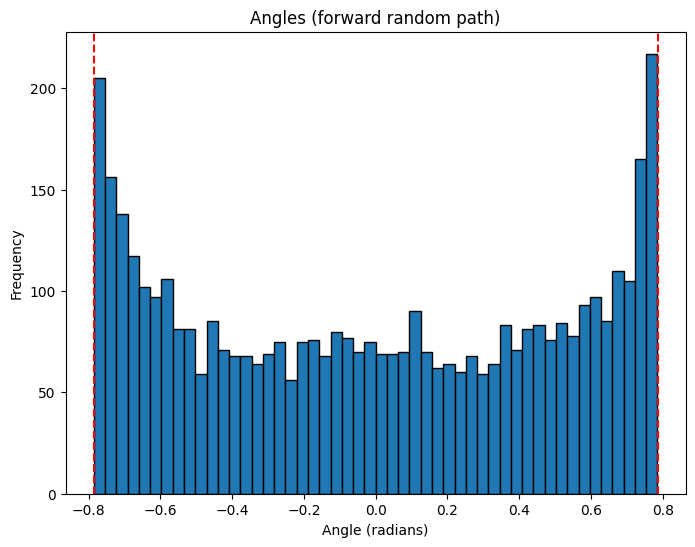

In [8]:
# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(angles, bins=50, edgecolor='black')
# Add dashed vertical lines at ±45 degrees
plt.axvline(np.radians(45), color='r', linestyle='--')
plt.axvline(-np.radians(45), color='r', linestyle='--')
plt.title('Angles (forward random path)')
plt.xlabel('Angle (radians)')
plt.ylabel('Frequency')
plt.show()

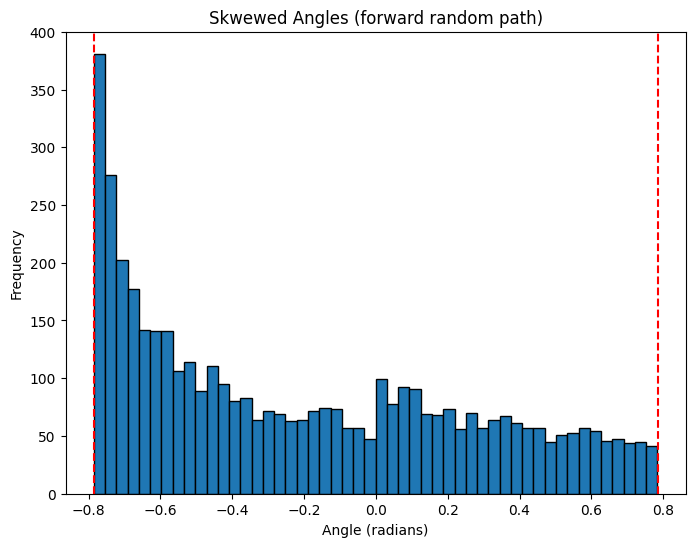

In [9]:
# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(skewed_angles, bins=50, edgecolor='black')
# Add dashed vertical lines at ±45 degrees
plt.axvline(np.radians(45), color='r', linestyle='--')
plt.axvline(-np.radians(45), color='r', linestyle='--')
plt.title('Skwewed Angles (forward random path)')
plt.xlabel('Angle (radians)')
plt.ylabel('Frequency')
plt.show()